In [1]:
import numpy as np

class MyModel:
    def __init__(self):
        self.class_prior_ = {}
        self.feature_prob_ = {}

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.classes_ = np.unique(y)

        for c in self.classes_:
            class_mask = (y == c)
            class_samples = X[class_mask]

            # Calculate class prior probability
            self.class_prior_[c] = class_samples.shape[0] / n_samples

            # Calculate feature probabilities for each class
            self.feature_prob_[c] = (class_samples.sum(axis=0) + 1) / (class_samples.shape[0] + 2)

    def predict(self, X):
        n_samples, n_features = X.shape
        predictions = []

        for i in range(n_samples):
            sample = X[i, :]
            class_scores = {}

            for c in self.classes_:
                class_scores[c] = np.log(self.class_prior_[c]) + np.sum(
                    np.log(self.feature_prob_[c]) * sample +
                    np.log(1 - self.feature_prob_[c]) * (1 - sample)
                )

            # Find the class with the highest score
            predicted_class = max(class_scores, key=class_scores.get)
            predictions.append(predicted_class)

        return np.array(predictions)

    def score(self, X, y):
        y_pred = self.predict(X)
        return (y_pred == y).mean()


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np

# Load MNIST dataset
mnist = fetch_openml("mnist_784")

# Convert data to boolean values using a threshold
threshold = 128  # You can adjust this threshold as needed
X = (mnist.data.astype(int) >= threshold).astype(bool)

# Extract the data and target (labels)
y = (mnist.target.astype(float) >= 5).astype(bool)  # For binary classification (e.g., 5 or not 5)



/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


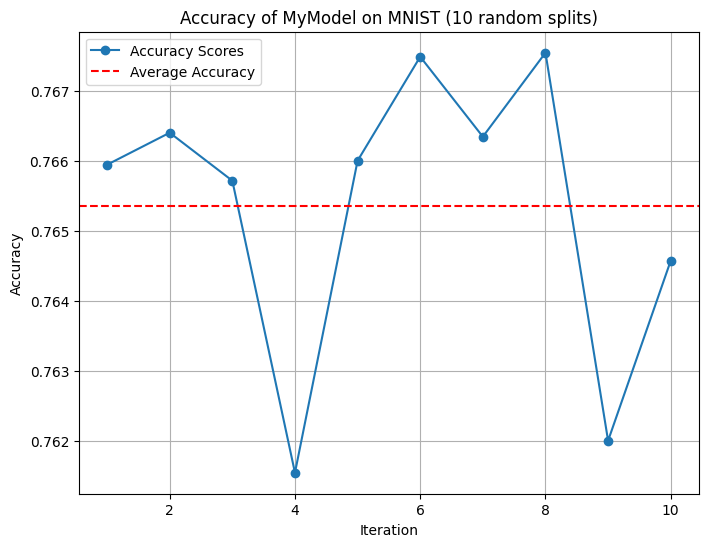

Average Accuracy: 76.54%


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Lists to store accuracy scores
accuracy_scores = []

for iteration in range(10):
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)  # Random split each time
    model = MyModel()
    model.fit(Xtrain, ytrain)
    accuracy = model.score(Xtest.values, ytest.values)
    accuracy_scores.append(accuracy)

# Calculate the average accuracy
average_accuracy = np.mean(accuracy_scores)

# Plot the accuracy scores for each iteration and the average accuracy
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), accuracy_scores, marker='o', label='Accuracy Scores')
plt.axhline(average_accuracy, color='red', linestyle='--', label='Average Accuracy')
plt.title("Accuracy of MyModel on MNIST (10 random splits)")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Print the average accuracy
print(f"Average Accuracy: {average_accuracy:.2%}")


In [ ]:
Xtest


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
6670,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
49567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
50796,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
22310,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
54037,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32138,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
53648,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64554,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
33812,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Testing accuracy: 76.53%


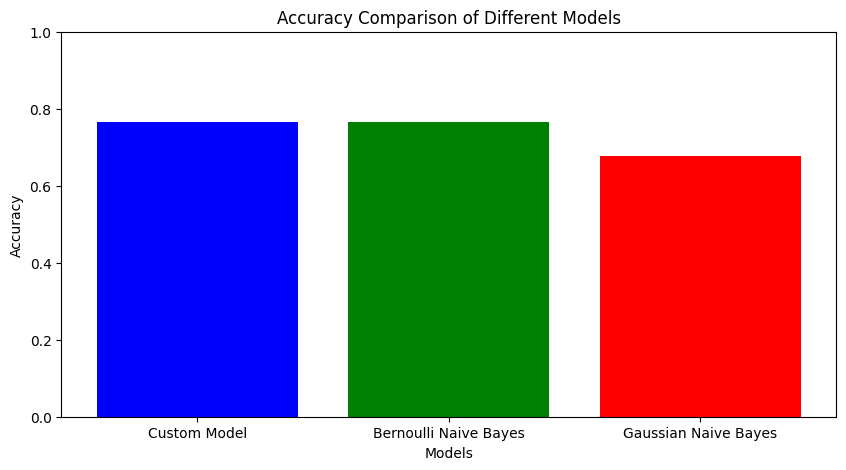

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import BernoulliNB, GaussianNB

# Assuming you have already defined Xtrain, Xtest, ytrain, and ytest

# Our bernouilli model
model = MyModel()
model.fit(Xtrain, ytrain)
accuracy1 = model.score(Xtest.values, ytest.values)
print(f"Testing accuracy: {accuracy1:.2%}")

# SciLearn's Bernoulli Naive Bayes model
model2 = BernoulliNB()
model2.fit(Xtrain, ytrain)
y_pred = model2.predict(Xtest)
accuracy2 = accuracy_score(ytest, y_pred)

# SciLearn's Gaussian Naive Bayes model
Xtrain_flatten = Xtrain.values.reshape(-1, 784)
Xtest_flatten = Xtest.values.reshape(-1, 784)
model3 = GaussianNB()
model3.fit(Xtrain_flatten, ytrain)
y_pred = model3.predict(Xtest_flatten)
accuracy3 = accuracy_score(ytest, y_pred)

# Create a bar chart to compare the accuracies
models = ['Custom Model', 'Bernoulli Naive Bayes', 'Gaussian Naive Bayes']
accuracies = [accuracy1, accuracy2, accuracy3]

plt.figure(figsize=(10, 5))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.ylim(0, 1)  # Set the y-axis limit from 0 to 1 for accuracy percentage
plt.show()
